# 🔎 Related Queries Walkthrough — Meditation Trend Pulse

This notebook demonstrates how the **Related Queries page** of the app was built.

Like the other notebooks, this is a **static walkthrough** that:
- Loads the exact datasets used by the Streamlit page  
- Recreates the **tables and charts** for “Top”, “Rising”, and “Shared” related queries  
- Documents the **logic and design choices** behind each view

### Why this notebook matters
- Provides a **transparent, reproducible** record for review and hiring managers  
- Mirrors the app’s insights without needing to run the live dashboard  
- Keeps the style **consistent** with the Global & Country notebooks

### Contents
1. ⭐ Top Related Queries (by keyword)  
2. 📈 Rising Related Queries (momentum)  
3. 🤝 Shared Related Queries (overlap across keywords)

In [2]:
# ──────────────────────────────────────────────
# 📦 Setup — Related Queries Walkthrough
# ──────────────────────────────────────────────
import os                       # file paths
import pandas as pd             # data wrangling
import matplotlib.pyplot as plt # plotting (matplotlib only, consistent with other notebooks)

# Display options for neat tables
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 12)
pd.set_option("display.float_format", "{:,.2f}".format)

# Data paths
DATA_DIR = os.path.normpath(os.path.join("..", "data", "streamlit"))
TOP_PATH     = os.path.join(DATA_DIR, "related_queries_top10.csv")
RISING_PATH  = os.path.join(DATA_DIR, "related_queries_rising10.csv")
SHARED_PATH  = os.path.join(DATA_DIR, "related_queries_shared.csv")

# Load datasets
df_top    = pd.read_csv(TOP_PATH)
df_rising = pd.read_csv(RISING_PATH)
df_shared = pd.read_csv(SHARED_PATH)

# Peek
print("Top:", df_top.shape, "| Rising:", df_rising.shape, "| Shared:", df_shared.shape)
df_top.head()

Top: (50, 4) | Rising: (50, 4) | Shared: (16, 5)


,keyword,related_query,query_type,popularity_score
0,breathwork,holotropic breathwork,top,100
1,breathwork,breathwork training,top,59
2,breathwork,breathwork meditation,top,41
3,breathwork,what is breathwork,top,36
4,breathwork,breathwork near me,top,32


### ⭐ Top Related Queries (by keyword)

This table lists the **most frequently co‑searched queries** for each primary keyword, based on Google Trends’ *Top* metric.  
Use it to understand how users **expand or refine** their search intent around meditation-related topics.

In [3]:
# ──────────────────────────────────────────────
# ⭐ Prepare “Top Related” for a clean view
# ──────────────────────────────────────────────
# Expected columns (adjust if your schema differs):
#   keyword, related_query, popularity_score

# Normalize column names defensively
df_top = df_top.rename(columns={
    "query": "related_query",
    "score": "popularity_score"
})

# Clean text
df_top["keyword"] = df_top["keyword"].astype(str).str.strip()
df_top["related_query"] = df_top["related_query"].astype(str).str.strip()

# Keep required cols only
df_top = df_top[["keyword", "related_query", "popularity_score"]]

# Show top-5 rows per keyword
display(
    df_top.sort_values(["keyword","popularity_score"], ascending=[True, False])
         .groupby("keyword")
         .head(5)
         .reset_index(drop=True)
)

,keyword,related_query,popularity_score
0,breathwork,holotropic breathwork,100
1,breathwork,breathwork training,59
2,breathwork,breathwork meditation,41
3,breathwork,what is breathwork,36
4,breathwork,breathwork near me,32
...,...,...,...
20,yoga nidra,sleep yoga nidra,100
21,yoga nidra,yoga nidra youtube,82
22,yoga nidra,nidra yoga meditation,64
23,yoga nidra,meditation,63


### 📊 Visual: Top Related Queries — Single Keyword

Select a keyword below (by editing the variable) to view its **Top 10 related queries** as a horizontal bar chart.  
This mirrors the behavior of the Streamlit table but as a static figure for review.

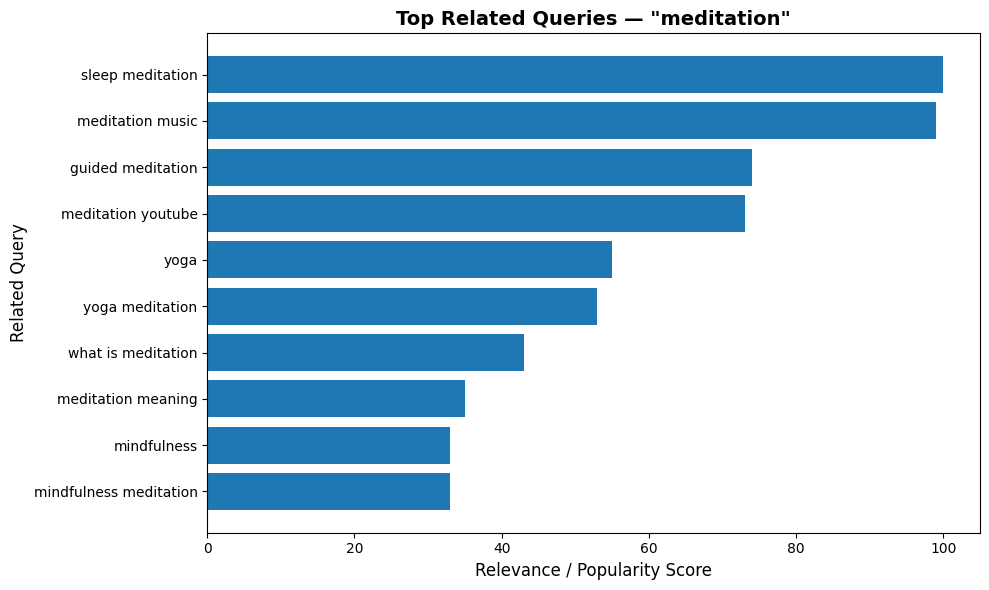

In [4]:
# ──────────────────────────────────────────────
# 📊 Plot: Top 10 related queries for one keyword
# ──────────────────────────────────────────────
SELECT_KEYWORD = "meditation"  # ← change to any of your tracked keywords

subset = (
    df_top[df_top["keyword"].str.lower() == SELECT_KEYWORD.lower()]
    .sort_values("popularity_score", ascending=True)
    .tail(10)
)

plt.figure(figsize=(10, 6))
plt.barh(subset["related_query"], subset["popularity_score"])
plt.title(f'Top Related Queries — "{SELECT_KEYWORD}"', fontsize=14, weight="bold")
plt.xlabel("Relevance / Popularity Score", fontsize=12)
plt.ylabel("Related Query", fontsize=12)
plt.tight_layout()
plt.show()

### 📈 Rising Related Queries (momentum)

Rising queries capture **surging interest**—terms growing fastest relative to their recent baseline.  
These often reflect **emerging topics, formats, or influencers**.

In [5]:
# ──────────────────────────────────────────────
# 📈 Prepare “Rising Related” for a clean view
# ──────────────────────────────────────────────
# Expected columns (adjust if your schema differs):
#   keyword, related_query, popularity_score  (or growth_score)

# Standardize possible column name differences
df_rising = df_rising.rename(columns={
    "query": "related_query",
    "score": "popularity_score",
    "growth_score": "popularity_score"
})

df_rising["keyword"] = df_rising["keyword"].astype(str).str.strip()
df_rising["related_query"] = df_rising["related_query"].astype(str).str.strip()
df_rising = df_rising[["keyword", "related_query", "popularity_score"]]

display(
    df_rising.sort_values(["keyword","popularity_score"], ascending=[True, False])
             .groupby("keyword")
             .head(5)
             .reset_index(drop=True)
)

,keyword,related_query,popularity_score
0,breathwork,gary brecka breathwork,31500
1,breathwork,somatic release breathwork,30450
2,breathwork,othership breathwork,25650
3,breathwork,breathwork sessie,19950
4,breathwork,9d breathwork,11100
...,...,...,...
20,yoga nidra,yoga nidra ally boothroyd,131050
21,yoga nidra,yoga nidra nsdr,65350
22,yoga nidra,nsdr,65300
23,yoga nidra,anabel otero yoga nidra,27900


### 📊 Visual: Rising Related Queries — Single Keyword

Change the keyword selector to explore the **Top 10 rising queries** for that topic.

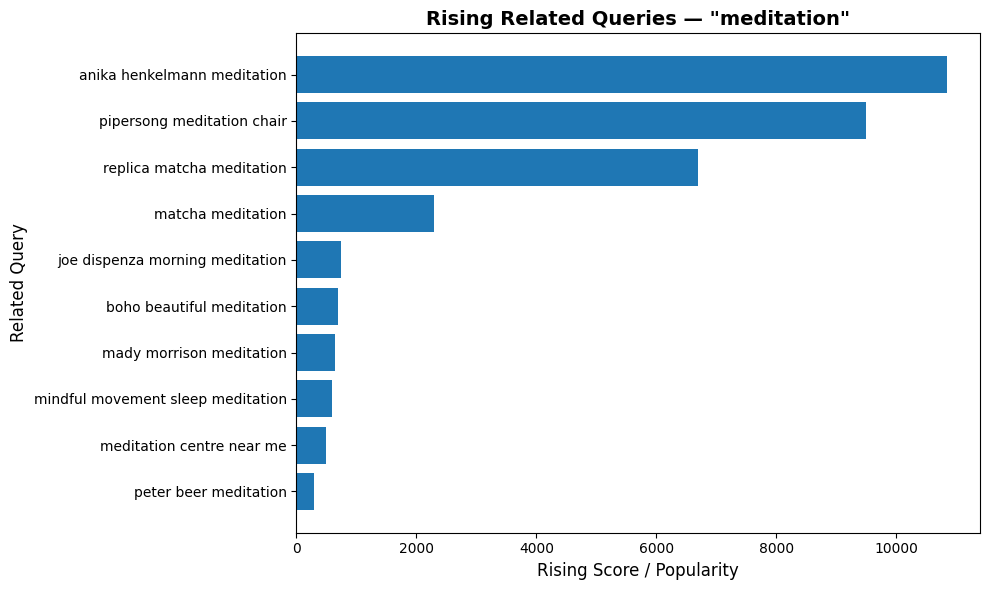

In [7]:
# ──────────────────────────────────────────────
# 📊 Plot: Top 10 rising related queries
# ──────────────────────────────────────────────
SELECT_KEYWORD_RISING = "meditation"  # ← change as desired

subset_r = (
    df_rising[df_rising["keyword"].str.lower() == SELECT_KEYWORD_RISING.lower()]
    .sort_values("popularity_score", ascending=True)
    .tail(10)
)

plt.figure(figsize=(10, 6))
plt.barh(subset_r["related_query"], subset_r["popularity_score"])
plt.title(f'Rising Related Queries — "{SELECT_KEYWORD_RISING}"', fontsize=14, weight="bold")
plt.xlabel("Rising Score / Popularity", fontsize=12)
plt.ylabel("Related Query", fontsize=12)
plt.tight_layout()
plt.show()

### 🤝 Shared Related Queries (overlap across keywords)

This section surfaces queries that **appear for multiple primary keywords**, revealing **common user intents**.  
It’s useful for spotting **bridge topics** (e.g., breathwork ↔ meditation) that connect different audiences.

In [8]:
# ──────────────────────────────────────────────
# 🤝 Build “Most-Shared” Related Queries table
# ──────────────────────────────────────────────
# Expected columns: keyword, related_query
df_shared = df_shared.rename(columns={"query": "related_query"})
df_shared["keyword"] = df_shared["keyword"].astype(str).str.strip()
df_shared["related_query"] = df_shared["related_query"].astype(str).str.strip()

# Count how many distinct keywords each related_query appears under
df_shared_counts = (
    df_shared.groupby("related_query")["keyword"]
             .nunique()
             .reset_index(name="keyword_count")
             .sort_values("keyword_count", ascending=False)
)

# Show the most “universal” related queries
df_shared_counts.head(20)

,related_query,keyword_count
5,mindfulness meditation,3
0,meditation,2
1,meditation for anxiety,2
2,meditation for sleep,2
3,meditation music,2
4,mindfulness,2
6,sleep meditation,2


### 🤝 Visual: Most‑Shared Related Queries

This bar chart highlights related queries that **appear under multiple primary keywords**.  
Higher bars indicate **broader relevance** across topics, helping you spot **bridge intents** (e.g., breathwork ↔ meditation).  
The view shows the top N (default **15**) and is sorted so the **most universally shared** queries appear at the top.

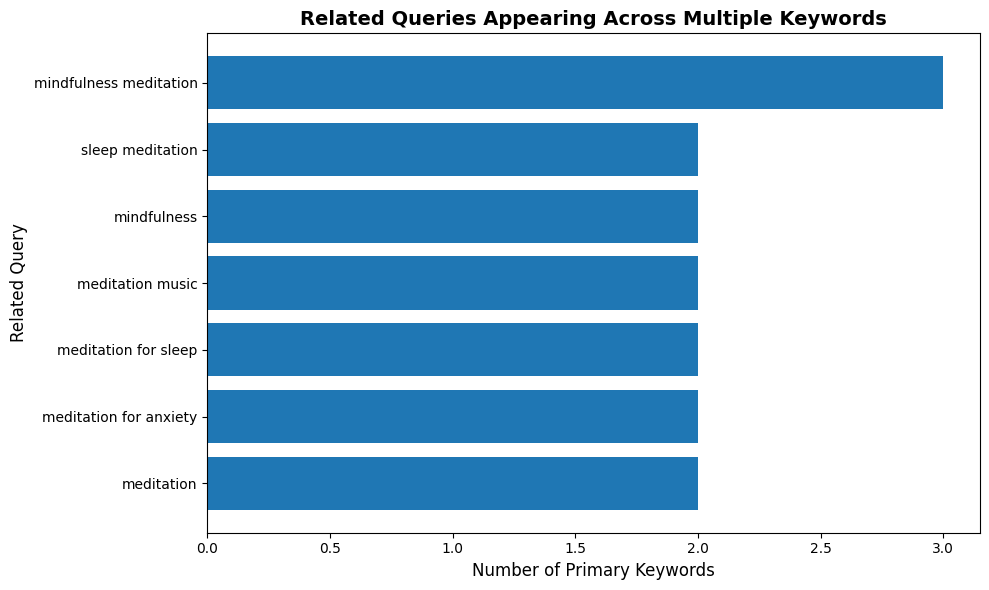

In [9]:
# ──────────────────────────────────────────────
# 📊 Plot: Most-Shared Related Queries
# ──────────────────────────────────────────────
top_n = 15
plot_df = df_shared_counts.head(top_n).sort_values("keyword_count", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(plot_df["related_query"], plot_df["keyword_count"])
plt.title("Related Queries Appearing Across Multiple Keywords", fontsize=14, weight="bold")
plt.xlabel("Number of Primary Keywords", fontsize=12)
plt.ylabel("Related Query", fontsize=12)
plt.tight_layout()
plt.show()

## ✅ Conclusion — Related Queries Walkthrough

In this notebook, we reconstructed the **Related Queries page** with static, reproducible views.

### What we demonstrated
- ⭐ **Top Related** — most common co‑searches per keyword  
- 📈 **Rising Related** — fast‑growing query ideas signaling momentum  
- 🤝 **Shared Related** — overlap that reveals bridge intents across topics  

### Why this matters
These views explain **how people expand or refine** their meditation‑adjacent searches, helping stakeholders see **adjacencies, emerging trends, and common threads** behind the dashboard’s insights.